In [1]:
import pandas as pd
import numpy as np

In [2]:
from preprocessing import preprocess

In [3]:
joined = preprocess(5, 8, True)

/home/linda/PycharmProjects/bp-project-cuda/randomforest/preprocessing.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zeros.drop(["_merge"], axis=1, inplace=True)


In [4]:
joined

0  1  2  3  4  5  6  7  8  9  ... 31 32 33 34 35 36 37 38 39  \
0        A  A  A  A  C  A  A  C  C  G  ...  A  G  G  G  T  G  G  T  G   
1        A  A  A  A  C  C  G  A  G  G  ...  T  G  G  G  G  G  G  C  T   
2        A  A  A  A  C  C  G  G  G  A  ...  A  G  G  G  T  G  G  T  G   
3        A  A  A  A  C  G  A  G  C  A  ...  G  G  G  T  G  G  G  T  A   
4        A  A  A  A  C  G  A  G  C  T  ...  T  A  G  G  T  T  G  G  T   
...     .. .. .. .. .. .. .. .. .. ..  ... .. .. .. .. .. .. .. .. ..   
1611226  T  T  T  T  T  G  G  T  T  G  ...  G  G  T  A  A  C  T  G  G   
1611227  T  T  T  T  T  G  G  T  T  G  ...  A  G  G  G  T  G  G  G  G   
1611228  T  T  T  T  T  G  T  G  A  G  ...  T  T  G  G  C  G  T  G  G   
1611230  T  T  T  T  T  T  G  C  G  G  ...  G  C  C  G  G  T  G  A  G   
1611231  T  T  T  T  T  T  G  T  A  G  ...  T  G  A  A  T  A  G  T  C   

        occurrence_y  
0                  1  
1                  1  
2                  1  
3                  1  
4                  1  
...              ...  
1611226            0  
1611227            0  
1611228            0  
1611230            0  
1611231            0  

[1617250 rows x 41 columns]

In [5]:
joined_matrix = [[[0] * 40 for i in range(4)] for n in range(len(joined))]
print(np.array(joined_matrix).shape)

(1617250, 4, 40)


In [6]:
joined.reset_index(inplace=True)

for index, row in joined.iterrows():
    x = 0
    for i in row:
        if (i == 'A'):
            joined_matrix[index][0][x] = 1
        elif (i == 'C'):
            joined_matrix[index][1][x] = 1
        elif (i == 'G'):
            joined_matrix[index][2][x] = 1
        elif (i == 'T'):
            joined_matrix[index][3][x] = 1
        else:
            continue
        x += 1

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(joined_matrix, joined.occurrence_y, test_size=0.2, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=42) 

In [8]:
num_samples, timesteps, features = np.asarray(x_train).shape
x_train_2d = np.asarray(x_train).reshape(num_samples, timesteps * features)

In [9]:
num_samples, timesteps, features = np.asarray(x_val).shape
x_val_2d = np.asarray(x_val).reshape(num_samples, timesteps * features)

In [10]:
num_samples, timesteps, features = np.asarray(x_test).shape
x_test_2d = np.asarray(x_test).reshape(num_samples, timesteps * features)

In [11]:
import sklearn.metrics as metrics
from sklearn.ensemble import RandomForestClassifier
val = []
train = []
trees = range(1,71)
for tree in trees:
    rf = RandomForestClassifier(n_estimators=tree, random_state=42)
    rf.fit(x_train_2d, y_train)
    train.append(rf.score(x_train_2d, y_train))
    val.append(rf.score(x_val_2d, y_val))

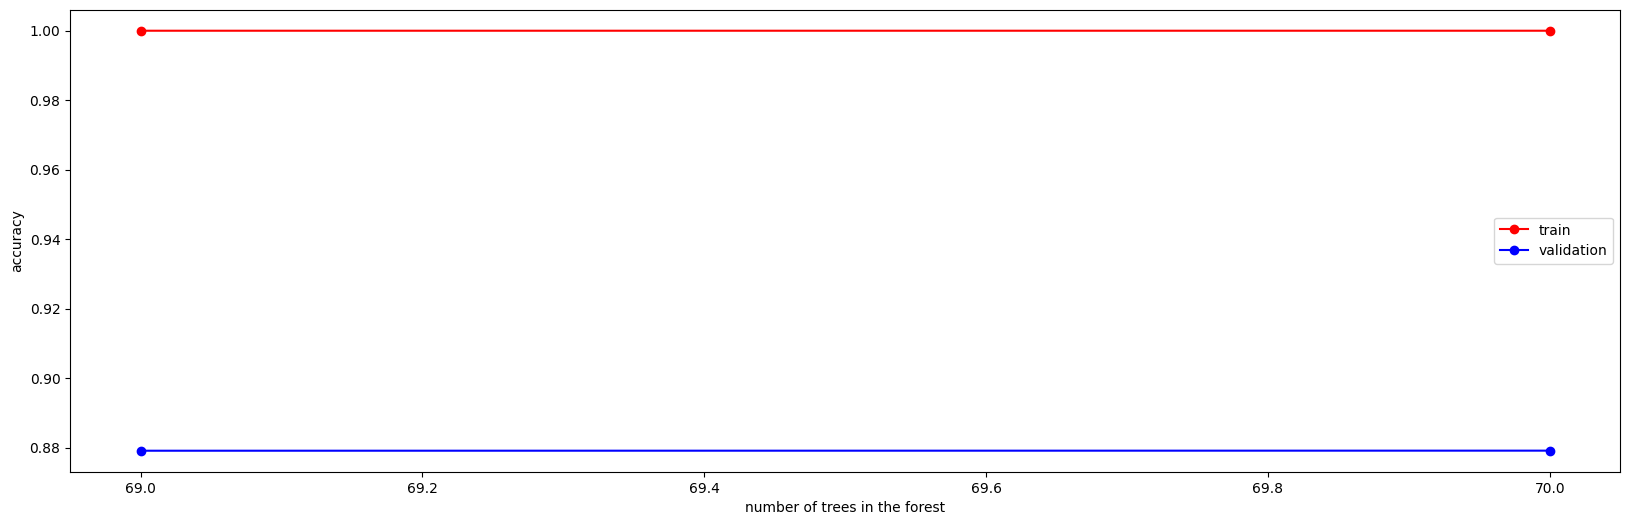

In [12]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(20,6))
plt.plot(trees, train,'or-')
plt.plot(trees, val,'ob-')
plt.xlabel('number of trees in the forest')
plt.ylabel('accuracy')
plt.legend(['train', 'validation'])

In [15]:
optimal = np.argmax(val) + 1
optimal

70

In [16]:
from sklearn.ensemble import RandomForestClassifier
#from sklearn.metrics import mean_squared_error
rf = RandomForestClassifier(n_estimators=optimal, random_state=42)
rf.fit(x_train_2d, y_train)
print(rf.score(x_test_2d, y_test))

0.879975266656361


In [17]:
data = pd.read_csv('../data/new_test_data.csv')

In [18]:
matrix = [[[0] * 40 for i in range(4)] for n in range(len(data))]
print(np.array(matrix).shape)

(793, 4, 40)


In [19]:
data.reset_index(inplace=True)

for index, row in data.iterrows():
    x = 0
    for i in row:
        if (i == 'A'):
            matrix[index][0][x] = 1
        elif (i == 'C'):
            matrix[index][1][x] = 1
        elif (i == 'G'):
            matrix[index][2][x] = 1
        elif (i == 'T'):
            matrix[index][3][x] = 1
        else:
            continue
        x += 1

In [20]:
num_samples, timesteps, features = np.asarray(matrix).shape
matrix_2d = np.asarray(matrix).reshape(num_samples, timesteps * features)

In [21]:
prediction = rf.predict(matrix_2d)

In [23]:
from sklearn import metrics
matr = metrics.confusion_matrix(data.occurrence, prediction)
matr

array([[ 14,  50],
       [ 27, 702]])

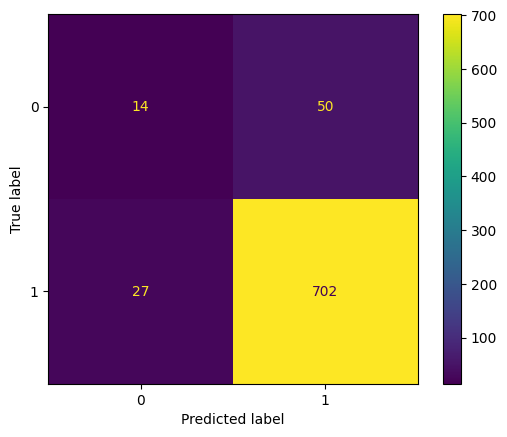

In [25]:
metrics.ConfusionMatrixDisplay.from_predictions(data.occurrence, prediction)

In [27]:
metrics.f1_score(1-data.occurrence, 1-prediction)

0.26666666666666666

In [28]:
data = pd.read_csv('../data/test_data.csv')

In [29]:
matrix = [[[0] * 40 for i in range(4)] for n in range(len(data))]

data.reset_index(inplace=True)

for index, row in data.iterrows():
    x = 0
    for i in row:
        if (i == 'A'):
            matrix[index][0][x] = 1
        elif (i == 'C'):
            matrix[index][1][x] = 1
        elif (i == 'G'):
            matrix[index][2][x] = 1
        elif (i == 'T'):
            matrix[index][3][x] = 1
        else:
            continue
        x += 1

In [30]:
num_samples, timesteps, features = np.asarray(matrix).shape
matrix_2d = np.asarray(matrix).reshape(num_samples, timesteps * features)

In [31]:
prediction = rf.predict(matrix_2d)
prediction

array([1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [32]:
metrics.f1_score(1-data.occurrence, 1-prediction)

0.2857142857142857